## Load Data ##

In [1]:
flights  <- read.csv ("../input/flights.csv",  stringsAsFactors=FALSE)
airports <- read.csv ("../input/airports.csv", stringsAsFactors=FALSE)
airlines <- read.csv ("../input/airlines.csv", stringsAsFactors=FALSE)

## Learning About the Data Frames ##

Printing summary data frame information

In [2]:
df.info <- function(x) {
  dat  <- as.character(substitute(x))  ##data frame name
  size <- format(object.size(x), units="Mb")  ##size of data frame in Mb
  
  ##column information
  column.info <- data.frame( column        = names(sapply(x, class)),
                             class         = sapply(x, class),
                             unique.values = sapply(x, function(y) length(unique(y))),
                             missing.count = colSums(is.na(x)),
                             missing.pct   = round(colSums(is.na(x)) / nrow(x) * 100, 2))
  
  row.names(column.info) <- 1:nrow(column.info)
  
  list(data.frame     = data.frame(name=dat, size=size),
       dimensions     = data.frame(rows=nrow(x), columns=ncol(x)),
       column.details = column.info)
}

df.info(flights)
df.info(airports)
df.info(airlines)

$data.frame
     name     size
1 flights 799.4 Mb

$dimensions
     rows columns
1 5819079      31

$column.details
                column     class unique.values missing.count missing.pct
1                 YEAR   integer             1             0        0.00
2                MONTH   integer            12             0        0.00
3                  DAY   integer            31             0        0.00
4          DAY_OF_WEEK   integer             7             0        0.00
5              AIRLINE character            14             0        0.00
6        FLIGHT_NUMBER   integer          6952             0        0.00
7          TAIL_NUMBER character          4898             0        0.00
8       ORIGIN_AIRPORT character           628             0        0.00
9  DESTINATION_AIRPORT character           629             0        0.00
10 SCHEDULED_DEPARTURE   integer          1321             0        0.00
11      DEPARTURE_TIME   integer          1441         86153        1.48
12     DEPARTURE_DELAY   integer          1218         86153        1.48
13            TAXI_OUT   integer           185         89047        1.53
14          WHEELS_OFF   integer          1441         89047        1.53
15      SCHEDULED_TIME   integer           551             6        0.00
16        ELAPSED_TIME   integer           713        105071        1.81
17            AIR_TIME   integer           676        105071        1.81
18            DISTANCE   integer          1363             0        0.00
19           WHEELS_ON   integer          1441         92513        1.59
20             TAXI_IN   integer           186         92513        1.59
21   SCHEDULED_ARRIVAL   integer          1435             0        0.00
22        ARRIVAL_TIME   integer          1441         92513        1.59
23       ARRIVAL_DELAY   integer          1241        105071        1.81
24            DIVERTED   integer             2             0        0.00
25           CANCELLED   integer             2             0        0.00
26 CANCELLATION_REASON character             5             0        0.00
27    AIR_SYSTEM_DELAY   integer           571       4755640       81.72
28      SECURITY_DELAY   integer           155       4755640       81.72
29       AIRLINE_DELAY   integer          1068       4755640       81.72
30 LATE_AIRCRAFT_DELAY   integer           696       4755640       81.72
31       WEATHER_DELAY   integer           633       4755640       81.72

$data.frame
      name   size
1 airports 0.1 Mb

$dimensions
  rows columns
1  322       7

$column.details
     column     class unique.values missing.count missing.pct
1 IATA_CODE character           322             0        0.00
2   AIRPORT character           322             0        0.00
3      CITY character           308             0        0.00
4     STATE character            54             0        0.00
5   COUNTRY character             1             0        0.00
6  LATITUDE   numeric           320             3        0.93
7 LONGITUDE   numeric           320             3        0.93

$data.frame
      name size
1 airlines 0 Mb

$dimensions
  rows columns
1   14       2

$column.details
     column     class unique.values missing.count missing.pct
1 IATA_CODE character            14             0           0
2   AIRLINE character            14             0           0

Ensuring the same airlines are represented in flights and airlines

In [3]:
airlines
unique(flights$AIRLINE)
sort(airlines$IATA_CODE) == sort(unique(flights$AIRLINE))

IATA_CODE,AIRLINE
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways
OO,Skywest Airlines Inc.
AS,Alaska Airlines Inc.
NK,Spirit Air Lines
WN,Southwest Airlines Co.
DL,Delta Air Lines Inc.


[1] "AS" "AA" "US" "DL" "NK" "UA" "HA" "B6" "OO" "EV" "MQ" "F9" "WN" "VX"

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

What are the values for the columns in flights we would expect to have few unique values?

In [4]:
table(flights$YEAR, flights$MONTH)
table(flights$DAY)
table(flights$DAY_OF_WEEK)
table(flights$DIVERTED, flights$CANCELLED)

      
            1      2      3      4      5      6      7      8      9     10
  2015 469968 429191 504312 485151 496993 503897 520718 510536 464946 486165
      
           11     12
  2015 467972 479230


     1      2      3      4      5      6      7      8      9     10     11 
189477 195986 190007 190893 189766 191232 187598 193964 194224 189288 190756 
    12     13     14     15     16     17     18     19     20     21     22 
190872 195089 188611 192950 195899 191319 191393 193284 195707 189413 192725 
    23     24     25     26     27     28     29     30     31 
193560 185017 187317 187387 191920 191401 179441 178771 103812 


     1      2      3      4      5      6      7 
865543 844600 855897 872521 862209 700545 817764 

   
          0       1
  0 5714008   89884
  1   15187       0

What is the range of values for some columns in flights that have a wide range of values?

 SCHEDULED_TIME   ELAPSED_TIME       AIR_TIME      ARRIVAL_DELAY    
 Min.   : 18.0   Min.   : 14      Min.   :  7.0    Min.   : -87.00  
 1st Qu.: 85.0   1st Qu.: 82      1st Qu.: 60.0    1st Qu.: -13.00  
 Median :123.0   Median :118      Median : 94.0    Median :  -5.00  
 Mean   :141.7   Mean   :137      Mean   :113.5    Mean   :   4.41  
 3rd Qu.:173.0   3rd Qu.:168      3rd Qu.:144.0    3rd Qu.:   8.00  
 Max.   :718.0   Max.   :766      Max.   :690.0    Max.   :1971.00  
 NA's   :6       NA's   :105071   NA's   :105071   NA's   :105071   
 AIR_SYSTEM_DELAY  SECURITY_DELAY    AIRLINE_DELAY     LATE_AIRCRAFT_DELAY
 Min.   :   0      Min.   :  0       Min.   :   0      Min.   :   0       
 1st Qu.:   0      1st Qu.:  0       1st Qu.:   0      1st Qu.:   0       
 Median :   2      Median :  0       Median :   2      Median :   3       
 Mean   :  13      Mean   :  0       Mean   :  19      Mean   :  23       
 3rd Qu.:  18      3rd Qu.:  0       3rd Qu.:  19      3rd Qu.:  29      

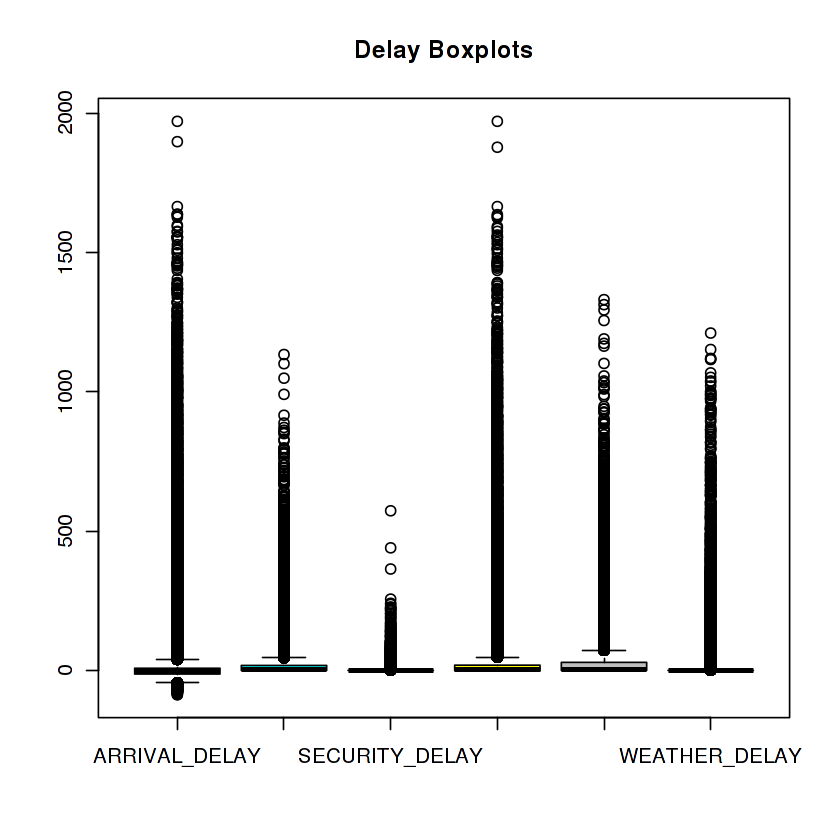

In [5]:
## create summary of flight time
keep <- c("SCHEDULED_TIME","ELAPSED_TIME","AIR_TIME","ARRIVAL_DELAY",
          "AIR_SYSTEM_DELAY","SECURITY_DELAY","AIRLINE_DELAY",
          "LATE_AIRCRAFT_DELAY","WEATHER_DELAY")

summary(flights[ ,keep])


## create boxplot of delay metrics
boxplot(flights[ ,keep[4:length(keep)]], col=4:length(keep), main="Delay Boxplots")

## Visualizations ##

Visualizing some of the skewed delay data

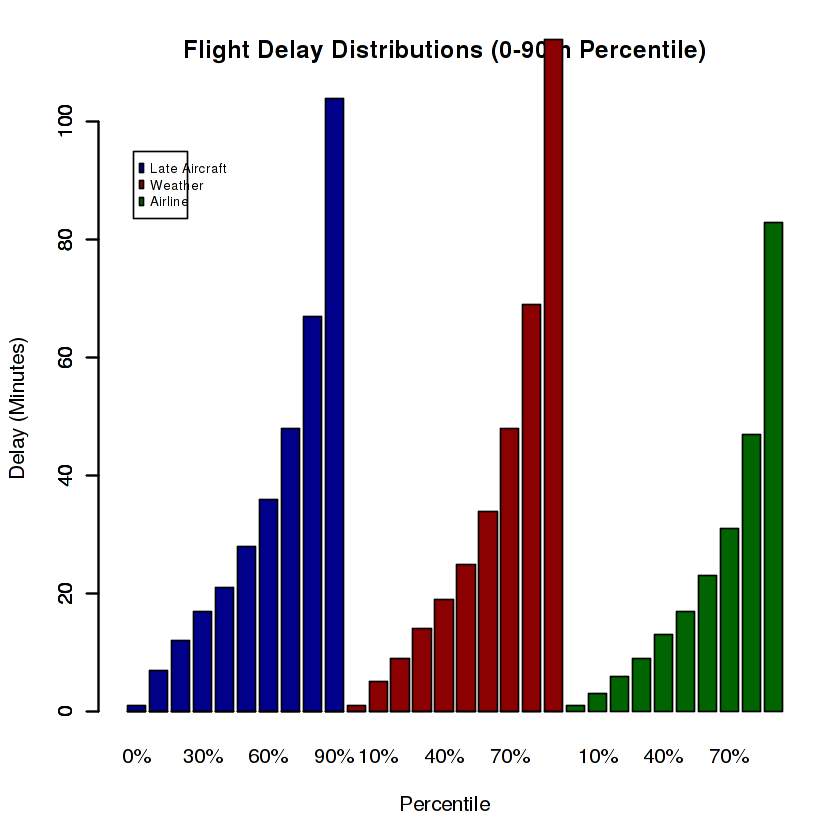

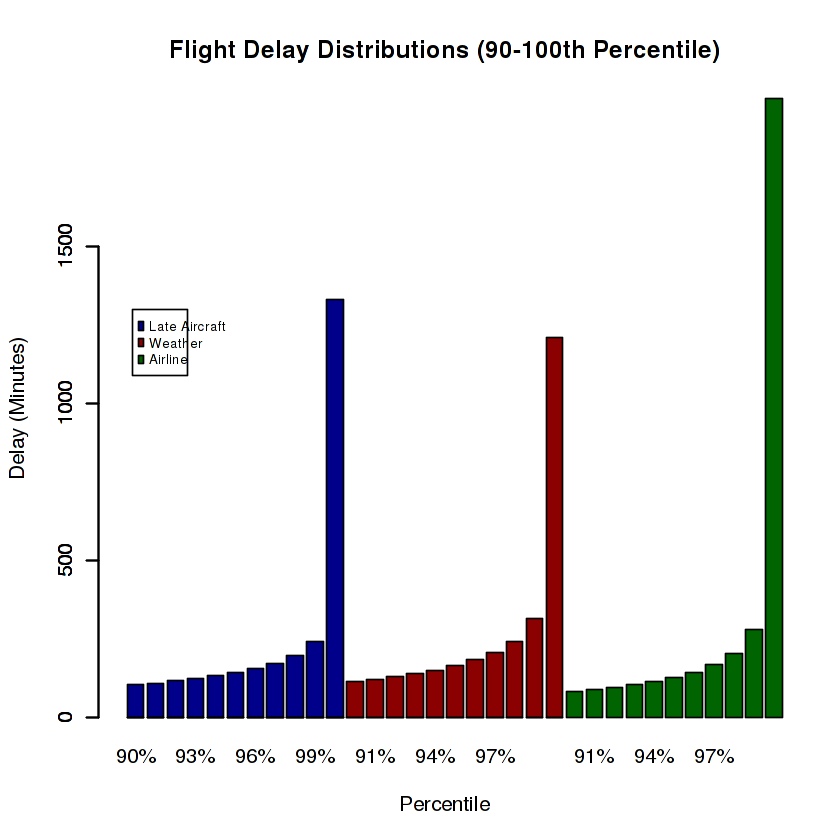

In [6]:
## create barplot of delay metrics, 0-90th percentile
p.90 <- function(x){
  p <- seq(0, 0.9, 0.1)  ## we will look at 0 to 90th percentile of positive delays
  quantile(x[x > 0], probs=p, na.rm=T)
}

barplot(p.90(flights$LATE_AIRCRAFT_DELAY), 
        main = "Flight Delay Distributions (0-90th Percentile)", 
        xlab = "Percentile", 
        ylab = "Delay (Minutes)",
        xlim = c(0,length(p.90(flights$LATE_AIRCRAFT_DELAY))*3.5),
        col  = "dark blue")

barplot(c(rep(0,length(p.90(flights$LATE_AIRCRAFT_DELAY))), p.90(flights$WEATHER_DELAY)),
        col  = "dark red",
        add  = TRUE)

barplot(c(rep(0,length(p.90(flights$LATE_AIRCRAFT_DELAY))*2), p.90(flights$AIRLINE_DELAY)),
        col  = "dark green",
        add  = TRUE)

legend(0.5, 95, c("Late Aircraft", "Weather", "Airline"),
       fill=c("dark blue", "dark red", "dark green"), cex=0.65)


## create barplot of delay metrics, right tail outliers (90-100th percentile)
right.tail <- function(x){
  p <- seq(0.9, 1, 0.01)
  quantile(x[x > 0], probs=p, na.rm=T) 
}

barplot(right.tail(flights$LATE_AIRCRAFT_DELAY), 
        main = "Flight Delay Distributions (90-100th Percentile)", 
        xlab = "Percentile", 
        ylab = "Delay (Minutes)",
        xlim = c(0,length(right.tail(flights$LATE_AIRCRAFT_DELAY))*3.5),
        ylim = c(0, max(c(flights$LATE_AIRCRAFT_DELAY, flights$WEATHER_DELAY, flights$AIRLINE_DELAY), na.rm=T)),
        col  = "dark blue")

barplot(c(rep(0,length(right.tail(flights$LATE_AIRCRAFT_DELAY))), right.tail(flights$WEATHER_DELAY)),
        col  = "dark red",
        add  = TRUE)

barplot(c(rep(0,length(right.tail(flights$LATE_AIRCRAFT_DELAY))*2), right.tail(flights$AIRLINE_DELAY)),
        col  = "dark green",
        add  = TRUE)

legend(0.5, 1300, c("Late Aircraft", "Weather", "Airline"),
       fill=c("dark blue", "dark red", "dark green"), cex=0.65)

Visualizing average arrival delay times (of delayed flights) by airline

,AIRLINE,AirlineCode,Mean.Arrival.Delay
2,Alaska Airlines Inc.,AS,-0.9765631
4,Delta Air Lines Inc.,DL,0.1867536
7,Hawaiian Airlines Inc.,HA,2.0230928
1,American Airlines Inc.,AA,3.4513721
12,US Airways Inc.,US,3.7062088
14,Southwest Airlines Co.,WN,4.3749637
13,Virgin America,VX,4.7377057
11,United Air Lines Inc.,UA,5.4315939
10,Skywest Airlines Inc.,OO,5.8456522
8,American Eagle Airlines Inc.,MQ,6.4578735


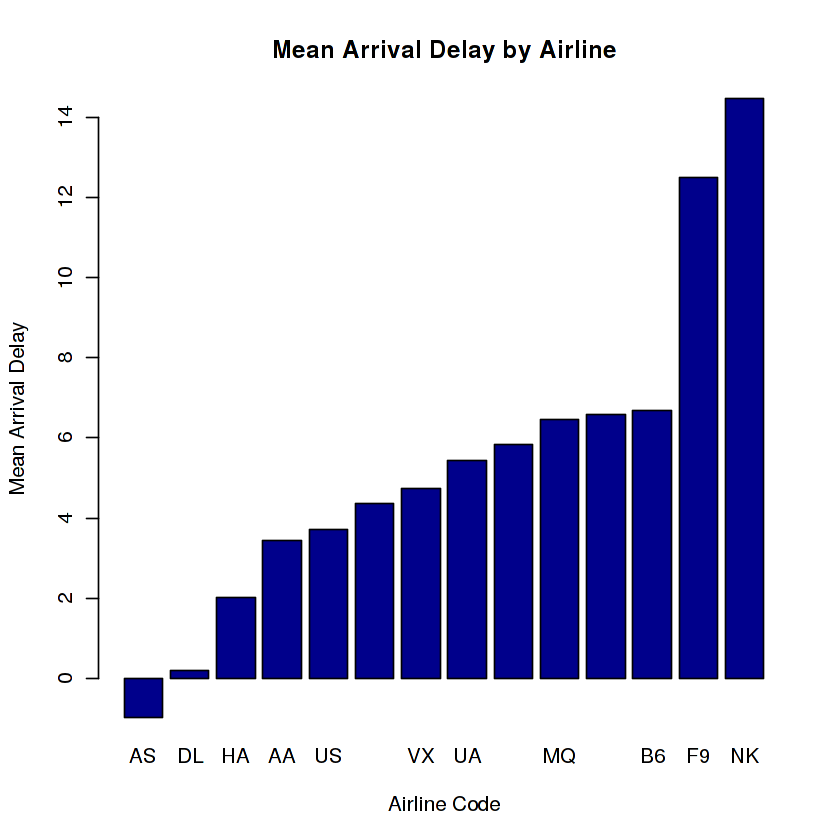

In [7]:
airline.avg.delay <- aggregate(flights$ARRIVAL_DELAY, by=list(flights$AIRLINE), mean, na.rm=T)
names(airline.avg.delay) <- c("AirlineCode", "Mean.Arrival.Delay")
airline.avg.delay <- merge(airline.avg.delay, airlines, by.x="AirlineCode", by.y="IATA_CODE", all.x=TRUE)

airline.avg.delay <- airline.avg.delay[order(airline.avg.delay$Mean.Arrival.Delay), ]
airline.avg.delay <- airline.avg.delay[ ,c(3,1,2)]

airline.avg.delay


barplot(airline.avg.delay$Mean.Arrival.Delay,
        names.arg=airline.avg.delay$AirlineCode,
        col="dark blue",
        main="Mean Arrival Delay by Airline", 
        xlab="Airline Code",
        ylab="Mean Arrival Delay")

Taking a look at the states represented in the airport data


AK AL AR AS AZ CA CO CT DE FL GA GU HI IA ID IL IN KS KY LA MA MD ME MI MN MO 
19  5  4  1  4 22 10  1  1 17  7  1  5  5  6  7  4  4  4  7  5  1  2 15  8  5 
MS MT NC ND NE NH NJ NM NV NY OH OK OR PA PR RI SC SD TN TX UT VA VI VT WA WI 
 5  8  8  8  3  1  3  4  3 14  5  3  5  8  3  1  4  3  5 24  5  7  2  1  4  8 
WV WY 
 1  6 

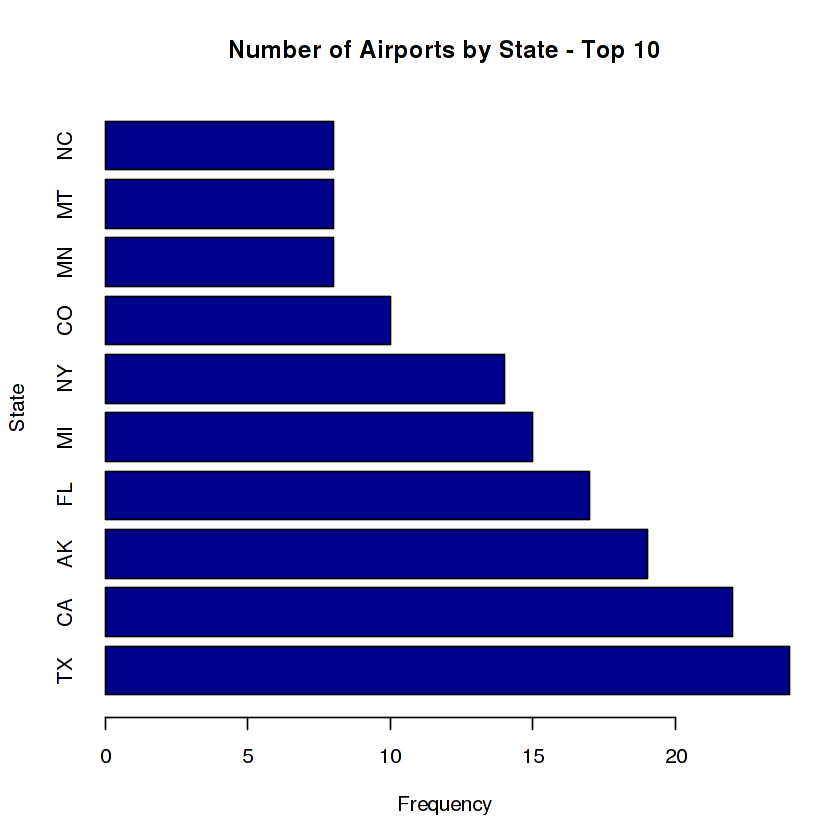

In [8]:
table(airports$STATE)

top10 <- as.data.frame(table(airports$STATE))
top10 <- top10[order(top10$Freq, decreasing=T), ][1:10, ]
barplot(top10$Freq,
        names.arg = top10$Var1,
        col = "dark blue",
        main = "Number of Airports by State - Top 10",
        xlab = "Frequency",
        ylab = "State",
        horiz=T)

Visualizing the location of airports represented

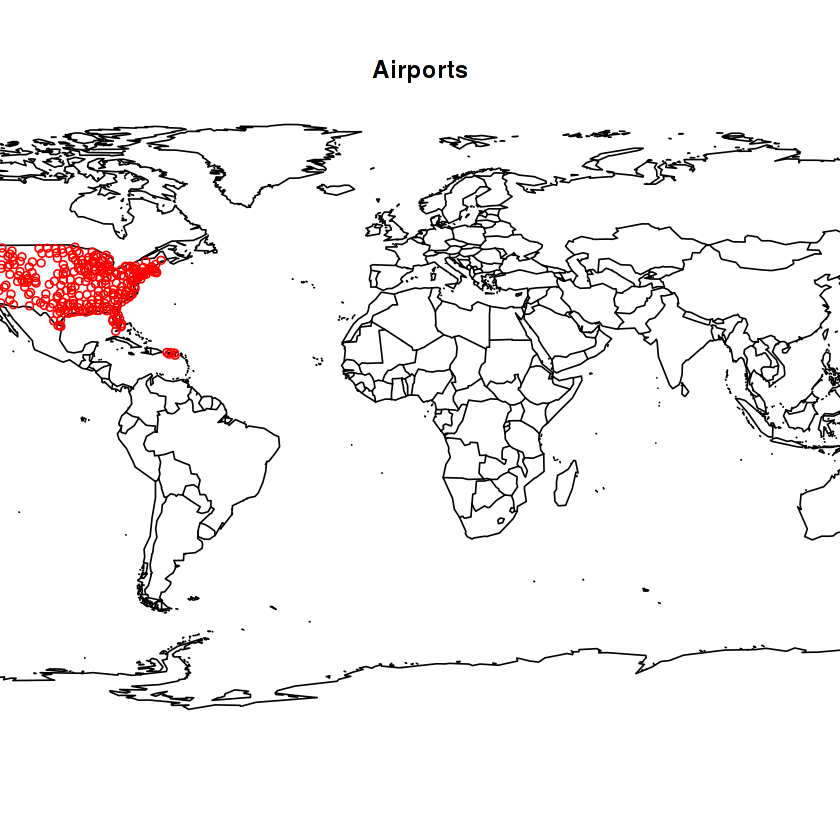

ERROR: Error in replayPlot(obj): invalid graphics state


In [9]:
library("maps")

map("world")
title("Airports")
points(airports$LONGITUDE, airports$LATITUDE, col="red", cex=0.75)

map("usa")
title("Airports")
points(airports$LONGITUDE, airports$LATITUDE, col="red", cex=0.75)